In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.style.available
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14.0, 11.0)

In [3]:
size_map = {
    'A': '46',
    'I': '48',
    'XS': '50',
    'S': '52',
    'M': '54',
    'L': '56',
    'XL': '58'
}
def size_to_int(x):
    r = size_map.get(x, None)
    x = np.int(r) if r else np.int(x)
    return x

def ravel_zero(x):
    return x if x != 0. else 1000423

In [4]:
data = pd.read_csv('data/orders_train.txt', sep=';')
# drop with quantity 0 as they have to have 0 returnQuantity -- to avoid wrong learning
data = data[data.quantity > 0]
# drop with returnQuantity > quantity
data = data[data.quantity >= data.returnQuantity]
# create explicit date objects
data['orderDate'] = pd.to_datetime(data['orderDate'])
# strings to integers
data['orderID'] = data['orderID'].apply(lambda x: x.replace('a', '')).astype(np.int)
data['articleID'] = data['articleID'].apply(lambda x: x.replace('i', '')).astype(np.int)
data['customerID'] = data['customerID'].apply(lambda x: x.replace('c', '')).astype(np.int)
data['voucherID'] = data['voucherID'].apply(lambda x: str(x).replace('v', '')).astype(np.float)
# remove nan in productGroup with 0 (zero was unused indeed) -- USE IMPUTATION OR LEARNING RATHER
data['productGroup'] = np.nan_to_num(data['productGroup']).astype(np.int)
# normalize size codes
data['sizeCodeNum'] = data.sizeCode.copy().apply(size_to_int)
# fit voucherID 0 and Nan to default range (set to 1000423 for gaussian like)
data['voucherIDNorm'] = data.voucherID.copy().apply(np.nan_to_num).apply(ravel_zero)
# aggregate price per product
data['pricePerProduct'] = (data.price / data.quantity).apply(np.nan_to_num)
# list savings
data['savedPerProduct'] = (data.rrp - data.pricePerProduct)

In [5]:
data[data.quantity > 1]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,sizeCodeNum,voucherIDNorm,pricePerProduct,savedPerProduct
125,1000047,2014-01-01,1000567,1493,42,3,2,30.00,19.99,0,0,1002626,2,BPRG,0,42,1000423,15.00,4.99
129,1000049,2014-01-01,1000663,1000,42,3,2,35.98,17.99,0,0,1089313,2,BPRG,0,42,1000423,17.99,0.00
250,1000092,2014-01-01,1003056,3927,I,17,2,35.98,17.99,0,0,1003945,2,BPRG,1,48,1000423,17.99,0.00
476,1000162,2014-01-01,1000566,1974,44,3,2,30.00,19.99,0,0,1015392,2,VORAUS,0,44,1000423,15.00,4.99
477,1000162,2014-01-01,1000566,1976,44,3,2,30.00,19.99,0,0,1015392,2,VORAUS,0,44,1000423,15.00,4.99
635,1000211,2014-01-01,1002987,3927,A,17,3,45.00,22.99,1000040,10,1088702,2,BPRG,0,46,1000040,15.00,7.99
958,1000321,2014-01-01,1000314,1493,40,3,2,45.98,22.99,0,0,1089417,2,BPRG,2,40,1000423,22.99,0.00
1006,1000336,2014-01-01,1000217,6791,28,2,2,139.98,69.99,0,0,1014772,2,PAYPALVC,1,28,1000423,69.99,0.00
1056,1000350,2014-01-01,1000312,1000,44,3,2,35.98,17.99,0,0,1022255,3,BPRG,2,44,1000423,17.99,0.00
1057,1000350,2014-01-01,1000325,1000,44,3,2,39.98,19.99,0,0,1022255,3,BPRG,2,44,1000423,19.99,0.00


/Users/Alex/.pyenv/versions/contagion/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


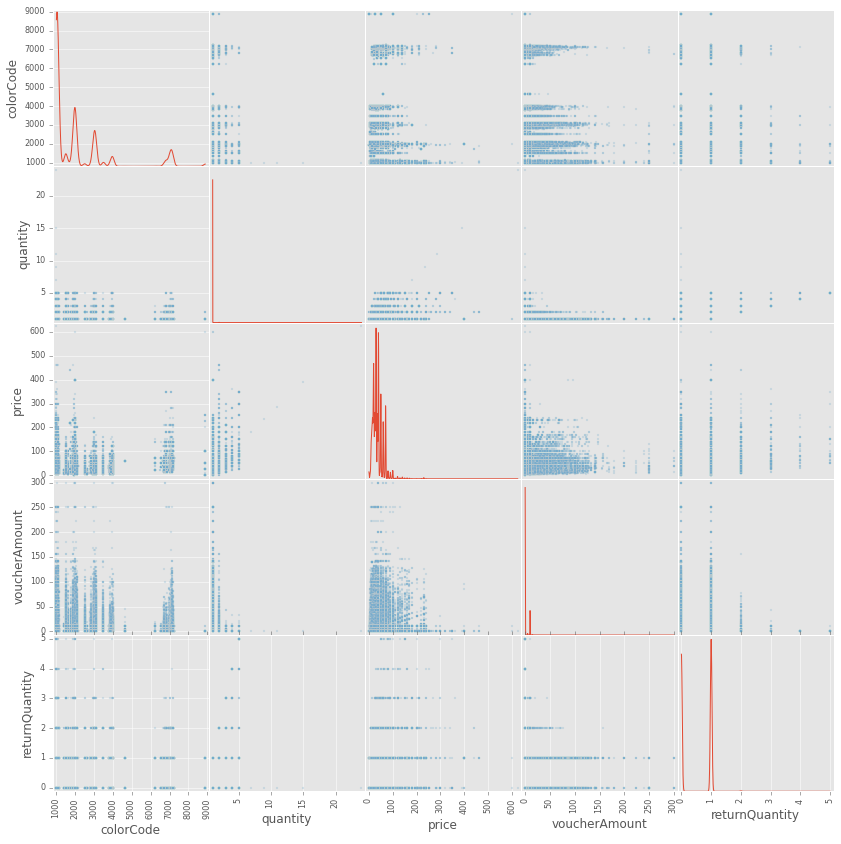

In [6]:
sub_data = data[['colorCode', 'sizeCode', 'quantity', 'price', 'voucherAmount', 'returnQuantity']]
plots = pd.tools.plotting.scatter_matrix(sub_data, alpha=0.2, figsize=(14, 14), diagonal='kde')

In [16]:
set(data.productGroup)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 17, 26, 43, 45, 50, 90}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c10a9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c218e48>]], dtype=object)

/Users/Alex/.pyenv/versions/contagion/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


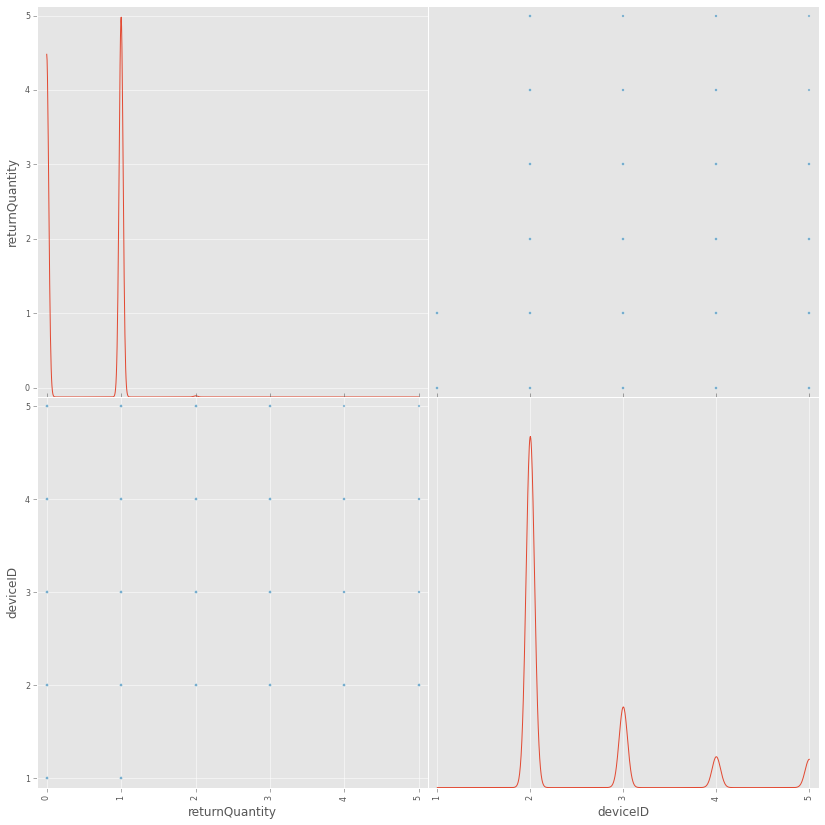

In [22]:
pd.tools.plotting.scatter_matrix(data[['returnQuantity', 'deviceID']], figsize=(14,14), diagonal='kde')

In [24]:
data[data.voucherAmount > (data.price * data.quantity)]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,sizeCodeNum,voucherIDNorm,pricePerProduct,savedPerProduct
2074,1000709,2014-01-02,1000571,3974,42,3,1,12.00,17.99,1000092,97.98,1064969,2,KGRG,1,42,1000092,12.00,5.99
2075,1000709,2014-01-02,1000629,1001,42,3,1,35.99,35.99,1000092,97.98,1064969,2,KGRG,1,42,1000092,35.99,0.00
2076,1000709,2014-01-02,1001505,2940,42,6,1,49.99,49.99,1000092,97.98,1064969,2,KGRG,1,42,1000092,49.99,0.00
2162,1000741,2014-01-02,1002998,3976,I,17,1,10.00,17.99,1000072,25.00,1058585,2,BPRG,1,48,1000072,10.00,7.99
2475,1000858,2014-01-02,1000339,1950,44,3,1,5.00,19.99,1000040,10.00,1089670,2,BPRG,1,44,1000040,5.00,14.99
7094,1002413,2014-01-05,1000339,1966,40,3,1,5.00,19.99,1000086,10.00,1002008,2,BPRG,0,40,1000086,5.00,14.99
7154,1002439,2014-01-05,1002988,3978,I,17,1,5.00,17.99,1000086,10.00,1022734,2,PAYPALVC,1,48,1000086,5.00,12.99
7155,1002439,2014-01-05,1003101,3972,I,17,1,5.00,22.99,1000086,10.00,1022734,2,PAYPALVC,1,48,1000086,5.00,17.99
7156,1002439,2014-01-05,1003126,3971,I,17,1,5.00,25.99,1000086,10.00,1022734,2,PAYPALVC,1,48,1000086,5.00,20.99
7280,1002484,2014-01-05,1000395,2966,36,3,1,5.00,22.99,1000078,10.00,1090394,2,BPRG,1,36,1000078,5.00,17.99
